<a href="https://colab.research.google.com/github/ShrutiChrist/Deep-Learning/blob/main/2348545_dl(lab9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM

### Importing dataset

In [1]:
import pandas as pd
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Normalising data

In [2]:
from sklearn.preprocessing import MinMaxScaler
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating training sets

In [3]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the LSTM model

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input
model=Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 22ms/step - loss: 0.0532 - mean_absolute_error: 0.1574
Epoch 2/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0065 - mean_absolute_error: 0.0632
Epoch 3/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0047 - mean_absolute_error: 0.0505
Epoch 4/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0039 - mean_absolute_error: 0.0452
Epoch 5/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0035 - mean_absolute_error: 0.0430
Epoch 6/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0035 - mean_absolute_error: 0.0423
Epoch 7/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0034 - mean_absolute_error: 0.0432
Epoch 8/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0030 - mean_absolute_error: 0.0399
Epoch 9/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0031 - mean_absolute_error: 0.0402
E

### Predicting price

In [5]:
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 436ms/step


### Displaying Prediction

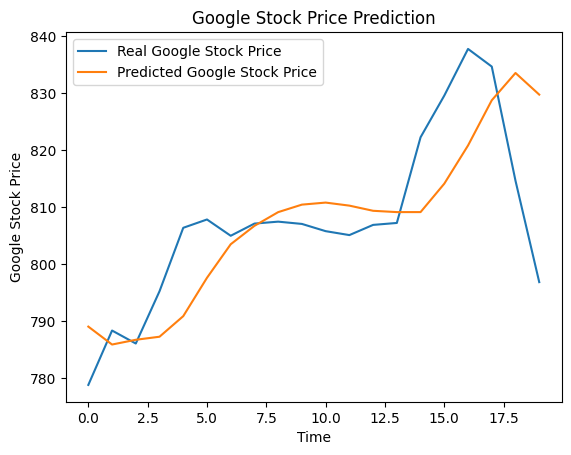

In [6]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()